<a href="https://colab.research.google.com/github/truong2710-cyber/Image-Classification-CIFAR10/blob/main/CNN_Image_Classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,datasets,layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(train_imgs, train_lbs), (test_imgs, test_lbs)=datasets.cifar10.load_data()
train_imgs=train_imgs/255.0
test_imgs=test_imgs/255.0
print(train_imgs.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
dataAugmentation=ImageDataGenerator(rotation_range=30, 
width_shift_range=0.1, height_shift_range=0.1, 
shear_range=0.2, zoom_range=0.2, horizontal_flip=True, 
fill_mode='nearest')



In [ ]:
print(train_lbs[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


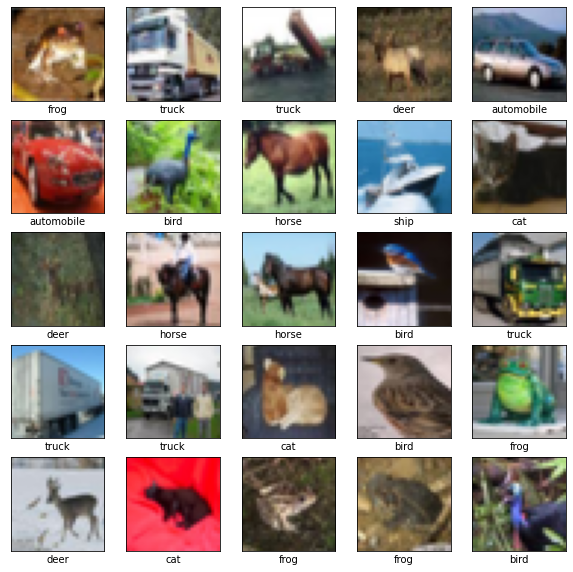

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_lbs[i][0]])
plt.show()

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

history = model.fit_generator(dataAugmentation.flow(train_imgs,train_lbs,batch_size=32),steps_per_epoch=train_imgs.shape[0]//32, epochs=23,validation_data=(test_imgs,test_lbs))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1562/1562 [==============================] - 206s 131ms/step - loss: 1.2842 - sparse_categorical_accuracy: 0.5373 - val_loss: 1.0993 - val_sparse_categorical_accuracy: 0.6101


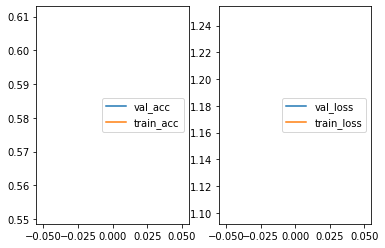

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['val_sparse_categorical_accuracy'],label='val_acc')
plt.plot(history.history['sparse_categorical_accuracy'],label='train_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='train_loss')
plt.legend()

In [ ]:
score = model.evaluate(test_imgs, test_lbs, verbose=0)
print(score)

[1.0992546081542969, 0.6100999712944031]


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sb
y_pred=model.predict_classes(train_imgs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[4373   75  102   21   41   22   44   32  135  155]
 [  45 4560    5    7    0    6   31    7   34  305]
 [ 282   25 3575   90  173  188  408  100   51  108]
 [ 146   44  242 2551  131  733  748  108  121  176]
 [ 111    9  318  132 3414  130  573  248   24   41]
 [  56   33  161  455  120 3563  290  210   42   70]
 [  19   40   98   78   37   45 4598   16   31   38]
 [ 101   13   85  105  175  182   88 4159   14   78]
 [ 365  155   37   13   17   10   16    6 4257  124]
 [ 133  313    7   11   10    9   33   18   33 4433]]


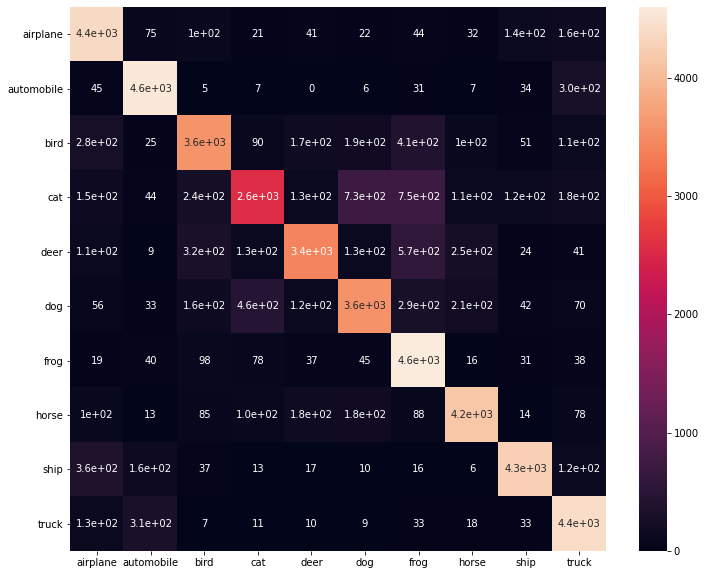

In [ ]:
cm=confusion_matrix(train_lbs,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize=(12,10))
sb.heatmap(df_cm,annot=True)


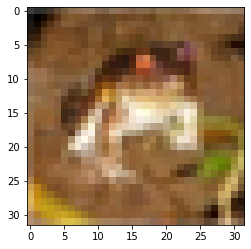

In [ ]:
img=train_imgs[0]
plt.imshow(img)
output_idx=[2,4,6]
outputs=[model.layers[idx].output for idx in output_idx]
model_extract=tf.keras.Model(inputs=model.inputs,outputs=outputs)

In [ ]:
feature_maps=model_extract.predict(train_imgs[:1])
feature_maps[2].shape 

(1, 4, 4, 256)

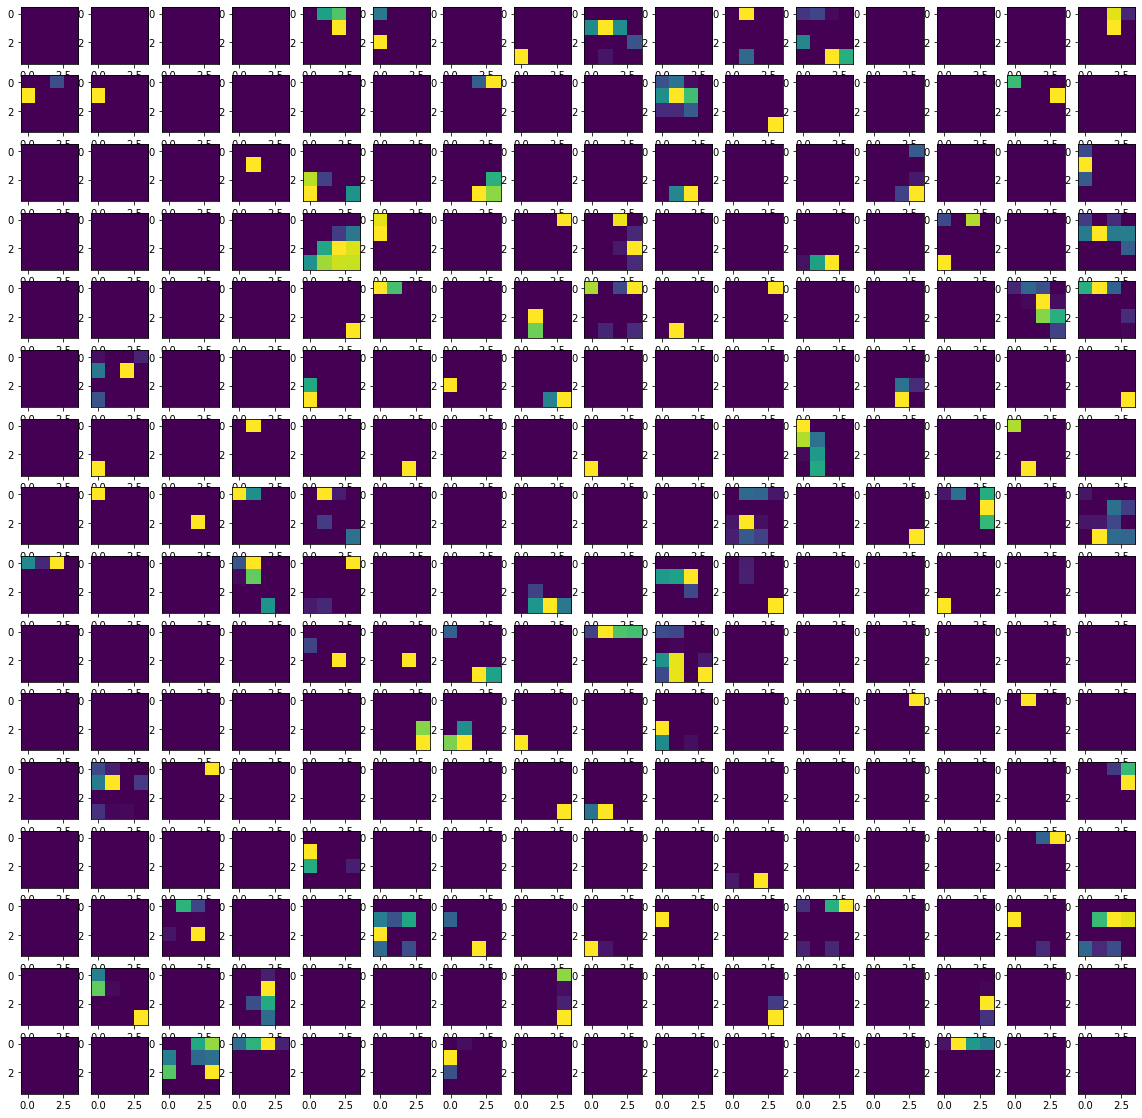

In [ ]:
idx=1
plt.figure(figsize=(20,20))
for i in range(16):
  for j in range(16):
    ax=plt.subplot(16,16,idx)
    plt.imshow(feature_maps[2][0,:,:,idx-1])
    idx+=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 4, 4, 256)
(256,)
(1, 4, 4)


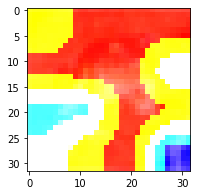

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
with tf.GradientTape() as tape:
  last_conv_layer=model.get_layer('conv2d_3')
  model_new=tf.keras.Model([model.inputs],[model.output,last_conv_layer.output])
  model_output,last_conv_layer_output=model_new(train_imgs[:1])
  class_output = model_output[:, np.argmax(model_output[0])]
  grads = tape.gradient(class_output, last_conv_layer_output)
  print(grads.shape)
  pooled_grads = np.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((4, 4))
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
  overlay_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype = cv2.CV_32F)
  plt.figure(figsize=(3,3))
  plt.imshow(overlay_img)
 
  

truck


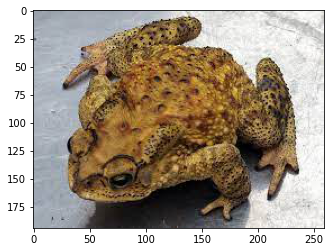

In [ ]:
from PIL import Image
import numpy as np

img=Image.open("/content/sample_data/coc.jpg")
plt.imshow(img)
img=img.resize((32,32))
xtest=tf.convert_to_tensor(np.array([np.asarray(img)]))
pred=np.argmax(np.asarray(model(xtest))[0])
print(class_names[pred])

